In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
%matplotlib inline

# Import Data

In [2]:
from tensorflow.examples.tutorials.mnist import input_data
import tensorflow as tf
mnist = input_data.read_data_sets("/tmp/data/", one_hot=True)

Extracting /tmp/data/train-images-idx3-ubyte.gz
Extracting /tmp/data/train-labels-idx1-ubyte.gz
Extracting /tmp/data/t10k-images-idx3-ubyte.gz
Extracting /tmp/data/t10k-labels-idx1-ubyte.gz


# 設定超參數

In [3]:
learning_rate = 0.001
training_epochs = 10
batch_size = 200

In [4]:
input_dim = 28*28
hidden1_dim = 256
hidden2_dim = 256
output_dim = 10

# 設定TensorFlow 計算圖

<b> placeholder </b>

In [5]:
x = tf.placeholder("float",[None, input_dim],name='x')
y = tf.placeholder("float",[None, output_dim],name='y')

tf.summary.image('input_image', tf.reshape(x, [-1,28,28,1]))

<tf.Tensor 'input_image:0' shape=() dtype=string>

<b> Input Layer to Hidden Layer 1</b>
<p> random_normal([n,m]): 隨機產生normal distribution (n*m matrix) </p>

In [6]:
with tf.name_scope('InputLayer_to_HiddenLayer1'):
    w1 = tf.Variable(tf.random_normal([input_dim, hidden1_dim]),name='weight1')
    b1 = tf.Variable(tf.random_normal([hidden1_dim]),name='bias1')
    a1 = tf.nn.relu(tf.add(tf.matmul(x,w1),b1))
    #a1 = tf.nn.sigmoid(tf.add(tf.matmul(x,w1),b1))
    
    # add summary
    tf.summary.histogram("w1", w1)
    tf.summary.histogram("b1", b1)
    tf.summary.histogram("a1", a1)

<b> Hidden Layer 1 to Hidden Layer 2 </b>
<p> activation function: relu or sigmoid </p>

In [7]:
with tf.name_scope('HiddenLayer1_to_HiddenLayer2'):
    w2 = tf.Variable(tf.random_normal([hidden1_dim, hidden2_dim]),name='weight2')
    b2 = tf.Variable(tf.random_normal([hidden2_dim]),name='bias2')
    a2 = tf.nn.relu(tf.add(tf.matmul(a1,w2),b2))
    #a2 = tf.nn.sigmoid(tf.add(tf.matmul(a1,w2),b2))
    
    # add summary
    tf.summary.histogram("w2", w2)
    tf.summary.histogram("b2", b2)
    tf.summary.histogram("a2", a2)

<b> Hidden Layer 2 to Output Layer </b>

In [8]:
with tf.name_scope('HiddenLayer2_to_OutputLayer'):
    w3 = tf.Variable(tf.random_normal([hidden2_dim, output_dim]),name='weight3')
    b3 = tf.Variable(tf.random_normal([output_dim]),name='bias3')
    y_pred = tf.add(tf.matmul(a2,w3),b3)
    
    # add summary
    tf.summary.histogram("w3", w3)
    tf.summary.histogram("b3", b3)
    tf.summary.histogram("y_pred", y_pred)

<b> Loss </b>

In [9]:
with tf.name_scope('Loss'):
    loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels=y, logits=y_pred))
    tf.summary.scalar("loss", loss)

<b> Accuracy </b>

In [10]:
with tf.name_scope('Accuracy'):
    correct_prediction = tf.equal(tf.argmax(y_pred, 1), tf.argmax(y, 1))
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, "float"))
    tf.summary.scalar("accuracy", accuracy)

<b> Optimizer (training) </b>
<p> Adam, GradientDescent </p>

In [11]:
with tf.name_scope('Optimizer'):
    optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(loss) 
    #optimizer = tf.train.GradientDescentOptimizer(learning_rate=learning_rate).minimize(cost)

<b> merge summary </b>

In [12]:
merged_summary = tf.summary.merge_all()

# 啟動Session

In [13]:
losses = []
val_losses = []

with tf.Session() as sess:
    # 初始化Variables
    sess.run(tf.global_variables_initializer())
    
    writer = tf.summary.FileWriter("log_mlp_summary/", graph=sess.graph)
    
    global_step = 0
    for epoch in range(training_epochs):
        num_batch = int(mnist.train.num_examples/batch_size)
        
        for i in range(num_batch):
            batch_x_train, batch_y_train = mnist.train.next_batch(batch_size)
            batch_x_validation, batch_y_validation = mnist.validation.next_batch(batch_size)
            
            # training by optimizer
            sess.run(optimizer, feed_dict={x: batch_x_train, y: batch_y_train})
            
            # get training/validation loss & acc
            batch_loss = sess.run(loss, feed_dict={x: batch_x_train, y: batch_y_train})
            batch_acc = sess.run(accuracy, feed_dict={x: batch_x_train, y: batch_y_train})
            batch_val_loss = sess.run(loss, feed_dict={x: batch_x_validation, y: batch_y_validation})
            batch_val_acc = sess.run(accuracy, feed_dict={x: batch_x_validation, y: batch_y_validation})
            
            # 紀錄每個batch的summary並加到writer中
            global_step += 1
            result = sess.run(merged_summary, feed_dict={x: batch_x_train, y: batch_y_train})
            writer.add_summary(result,global_step)
        
        losses.append(batch_loss)
        val_losses.append(batch_val_loss)
        
        print("Epoch:", '%d' % (epoch+1), ", loss=", batch_loss, ", acc=", batch_acc,
              ", val_loss=", batch_val_loss, ", val_acc=", batch_val_acc)
        
            
    # Test Dataset
    print ("Test Accuracy:", sess.run(accuracy, feed_dict={x: mnist.test.images, y: mnist.test.labels}))

Epoch: 1 , loss= 66.6948 , acc= 0.82 , val_loss= 102.98 , val_acc= 0.795
Epoch: 2 , loss= 46.7773 , acc= 0.87 , val_loss= 61.5056 , val_acc= 0.875
Epoch: 3 , loss= 18.8418 , acc= 0.94 , val_loss= 27.596 , val_acc= 0.905
Epoch: 4 , loss= 16.194 , acc= 0.93 , val_loss= 24.375 , val_acc= 0.9
Epoch: 5 , loss= 19.7436 , acc= 0.925 , val_loss= 24.3313 , val_acc= 0.925
Epoch: 6 , loss= 19.4746 , acc= 0.93 , val_loss= 22.8948 , val_acc= 0.89
Epoch: 7 , loss= 5.88072 , acc= 0.98 , val_loss= 22.1902 , val_acc= 0.93
Epoch: 8 , loss= 4.53617 , acc= 0.96 , val_loss= 12.5947 , val_acc= 0.94
Epoch: 9 , loss= 4.59477 , acc= 0.96 , val_loss= 21.1338 , val_acc= 0.915
Epoch: 10 , loss= 12.2098 , acc= 0.94 , val_loss= 10.5938 , val_acc= 0.955
Test Accuracy: 0.9262


# 比較 training/validation loss

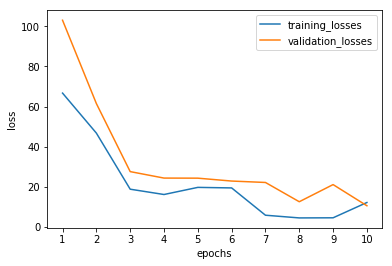

In [14]:
plt.ylabel('loss')
plt.xlabel('epochs')
xtick = [i for i in range(1,len(losses)+1)]
plt.xticks(xtick)
plt.plot(xtick, losses, label='training_losses')
plt.plot(xtick, val_losses, label='validation_losses')
plt.legend()
plt.show()

# TensorBoard

In [ ]:
# 啟動TensorBoard
!tensorboard --logdir=log_mlp_summary

TensorBoard 0.1.6 at http://pyda:6006 (Press CTRL+C to quit)
